## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of Lego sets!</p>

### **Task 2: Instructions**

* Import `pandas` and alias it as `pd`.

* Read the `csv` file located in the path `'datasets/colors.csv'` into a DataFrame named `colors`.

* Inspect the first five rows of the resulting colors DataFrame.

In [149]:
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

### **Task 3: Instructions**

* Create a variable named `num_colors` that counts the number of distinct colors.
* Print it out.



In [151]:
num_colors = colors['name'].nunique()
num_colors

135

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

### **Task 4: Instructions**

* Summarize colors based on their transparency.
* Save the result as a variable named `colors_summary`.
* Print out `colors_summary`.

Executing your code should result in the table shown below.

```
is_trans	id	name	 rgb
f	       107	107	 107
t	        28	 28	  28
```

In [153]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans')[['id', 'name', 'rgb']].count()
colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

### **Task 5: Instructions**

* Read the data in `datasets/sets.csv` as a DataFrame named `sets`.

* Create a summary of the average number of parts per year and save it as `parts_by_year`.

* Plot the average number of parts per year.

The first few rows of `parts_by_year` should resemble the table shown below:

```
year	num_parts
1950	10.14
1953	16.50
1954	12.36
1955	36.86
1956	18.50
```

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


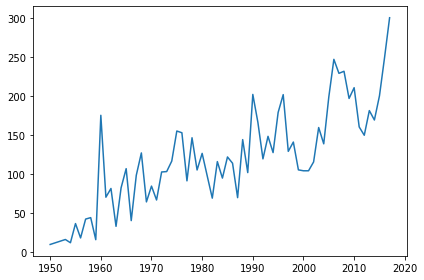

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
sets = pd.read_csv('datasets/sets.csv')

parts_by_year = sets.groupby('year')['num_parts'].mean()

# Create a summary of average number of parts by year: `parts_by_year`


plt.plot(parts_by_year)
plt.show()



## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

### **Task 6: Instructions**

* Create a summary of the number of distinct themes shipped by year.
* Save it as a DataFrame named `themes_by_year`.
* Print the first couple of rows in `themes_by_year`.

The first few rows of your data should resemble the table shown below.

```
year	theme_id
1950	2
1953	1
1954	2
1955	4
1956	3
```

**Note:** In this step you may need to use an aggregation function that you have yet to encounter. The **[documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats)** may be of assistance. You will want to find a way to return the number of unique values in each group.

In [157]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')[['theme_id']].nunique()
themes_by_year.head()

,theme_id
year,
1950,2
1953,1
1954,2
1955,4
1956,3


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the <code>themes_by_year</code> DataFrame you created in the previous step.</p>

### **Task 7: Instructions**

In 1999, Lego expanded into licensed sets with the introduction of Star Wars themed sets. In that year, how many unique themes were released?

* Assign your answer to the variable `num_themes`.
* Print `num_themes`.

In [159]:
# Get the number of unique themes released in 1999
num_themes = themes_by_year.loc[1999]

# Print the number of unique themes released in 1999
num_themes

theme_id    71
Name: 1999, dtype: int64